# Data Preparation for multivariate sequence models (LSTM, RNN)

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp
%matplotlib inline

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
mp.rcParams['figure.figsize'] = (12,6)
mp.rcParams['axes.grid'] = False

In [9]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## We are having data of every 10 mins

In [12]:
df[['date', 'T_out', 'RH_2', 'Appliances', 'lights']]

,date,T_out,RH_2,Appliances,lights
0,2016-01-11 17:00:00,6.600000,44.790000,60,30
1,2016-01-11 17:10:00,6.483333,44.722500,60,30
2,2016-01-11 17:20:00,6.366667,44.626667,50,30
3,2016-01-11 17:30:00,6.250000,44.590000,50,40
4,2016-01-11 17:40:00,6.133333,44.530000,60,40
...,...,...,...,...,...
19730,2016-05-27 17:20:00,22.733333,42.025714,100,0
19731,2016-05-27 17:30:00,22.600000,42.080000,90,0
19732,2016-05-27 17:40:00,22.466667,42.768571,270,10
19733,2016-05-27 17:50:00,22.333333,43.036000,420,10


# Aim is to predict the appliance energy usage based on different parameters..temp, lights... etc

In [13]:
df['date'] = pd.to_datetime(df['date'])

<AxesSubplot:xlabel='date'>

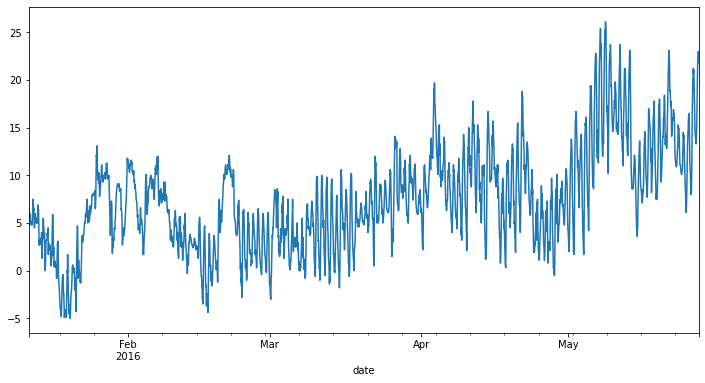

In [24]:
df.set_index('date')['T_out'].plot()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

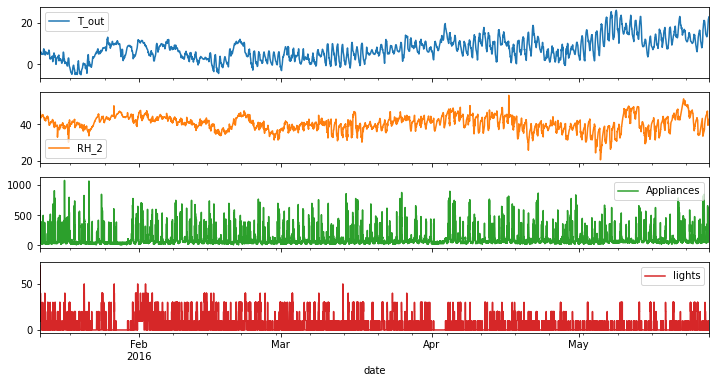

In [26]:
df.set_index('date')[['T_out', 'RH_2', 'Appliances', 'lights']].plot(subplots=True)

In [27]:
df.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

### Appliances means the count of appliances .... 

    in features we are selecting more than 1 feature so cannot directly convert into list ... first into numpy then list

In [31]:
features = df[['Appliances','T_out', 'RH_2']].to_numpy().tolist() # Appliances means no. of appliances
target = df['Appliances'].tolist()

In [38]:
features[0:11] # just fetching the first 11 records

[[60.0, 6.6, 44.79],
 [60.0, 6.48333333333333, 44.7225],
 [50.0, 6.36666666666667, 44.6266666666667],
 [50.0, 6.25, 44.59],
 [60.0, 6.133333333333329, 44.53],
 [50.0, 6.01666666666667, 44.5],
 [60.0, 5.9, 44.5],
 [60.0, 5.91666666666667, 44.5],
 [60.0, 5.93333333333333, 44.433333333333294],
 [70.0, 5.95, 44.4],
 [230.0, 5.96666666666667, 44.4]]

In [41]:
target[0:11] # Selecting the first 11 Targets 

[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

# Examples

<img src='3.png'/>

<img src='2.png'/>

###  TimeseriesGenerator
    This is an utility class for generating batches of temporal data.
    This class takes in a sequence of data-points gathered at
    equal intervals, along with time series parameters such as
    stride, length of history, etc., to produce batches for
    training/validation.

In [47]:
# LENGTH = INPUT LENGTH (WINDOW LENGTH)
# SAMPLING RATE = 1 MEANS CONTINOUS VALUES WE WANT
# THIS IS MULTI VARIATE FEATURES
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)

In [60]:
ts_generator[0] # RETURNING THE 1st BATCH... ie...t0 to t5 as the input and then t6 is label

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([60]))

#### This is basically showing the next times step as label ( array([60]) ) and the previous 6 th history data as inputs

In [61]:
ts_generator[2] # RETURNING THE 2st BATCH...ie... t1 to t6 as input then t7 is the label

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]),
 array([60]))

#### Basically it slided one more window... it depends on your stride value also

In [62]:
len(ts_generator)

19729

# Sliding Window and Tumbling window ( also known as Hopping window )

`
Input = 1,2,3,4,5,6,7,8,9
Sliding Window (window size = 3, stride = 1) = 123, 234, 345, 456, 567, 678, 789
Sliding window ( window size=3, stride = 2 ) = 123, 345, 567, 789
Tumbling Window (window size=3) = 123, 456, 789
`

In [63]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1, stride=2)
ts_generator

In [64]:
len(ts_generator)

9865

In [65]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([60]))

In [66]:
ts_generator[1]

(array([[[50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ],
         [60.        ,  5.9       , 44.5       ],
         [60.        ,  5.91666667, 44.5       ]]]),
 array([60]))

### Suppose we want to take t0 - t5 as input and then predict t6...t7...t8  Multiple outputs then??

In [67]:
pd.concat([df['Appliances'], df['Appliances'].shift(-1), df['Appliances'].shift(-2)], axis=1)

,Appliances,Appliances,Appliances
0,60,60.0,50.0
1,60,50.0,50.0
2,50,50.0,60.0
3,50,60.0,50.0
4,60,50.0,60.0
...,...,...,...
19730,100,90.0,270.0
19731,90,270.0,420.0
19732,270,420.0,430.0
19733,420,430.0,NaN


     So here what it is doing in the 2nd and the 3rd column is ... it is taking the 2nd row then start making the new column
     in the 3rd column ... it is starting from the 3rd row and started making a new column!!!
     
     And when you create shift then the last few rows will not have values so ...drop those

In [70]:
# CONVERTING INTO NUMPY ARRAY THEN TO LIST 

multi_target = pd.concat([df['Appliances'], df['Appliances'].shift(-1), df['Appliances'].shift(-2)], axis=1).dropna().to_numpy().tolist()

In [72]:
multi_target[0:13]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0],
 [230.0, 580.0, 430.0],
 [580.0, 430.0, 250.0],
 [430.0, 250.0, 100.0]]

#### Here we use features[:-2] so we are telling no to include the last 2 rows bcoz in the labels we dropped the last 2 NaN values

In [73]:
ts_generator = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)

In [76]:
ts_generator[0] # first 6 records

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]),
 array([[60., 60., 60.]]))

In [77]:
ts_generator[1] # next set of 6 records... HOPPING WINDOW OR TUMBLING WINDOW

(array([[[ 60.        ,   5.9       ,  44.5       ],
         [ 60.        ,   5.91666667,  44.5       ],
         [ 60.        ,   5.93333333,  44.43333333],
         [ 70.        ,   5.95      ,  44.4       ],
         [230.        ,   5.96666667,  44.4       ],
         [580.        ,   5.98333333,  44.4       ]]]),
 array([[430., 250., 100.]]))